# Unsupervised Machine Learning by K-Means Algorithm

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler

## Step 1: Data Preparation

In [5]:
# !pwd

In [257]:
# Load input data
x_original = pd.read_csv('../data/Emp-Attrition-Initial-Clean.csv', delimiter=',')
x_original = x_original.drop(columns=['Attrition'])

In [259]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.59004834,  0.74252653, -1.40151234, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 0.91319439, -1.2977746 ,  0.49381714, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [-0.59004834,  1.41436324,  0.49381714, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-0.59004834, -1.60518328,  0.49381714, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 0.91319439,  0.54667746, -1.40151234, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.59004834, -0.43256792,  0.49381714, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [284]:
#X = X_scaled.values
#X = X[: , 1:]

# X = np.loadcsv('../data/Emp-Attrition-Initial-Clean.csv', delimiter=',')
print(X)

[[-0.59004834  0.74252653 -1.40151234 ... -0.0632959  -0.67914568
   0.24583399]
 [ 0.91319439 -1.2977746   0.49381714 ...  0.76499762 -0.36871529
   0.80654148]
 [-0.59004834  1.41436324  0.49381714 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-0.59004834 -1.60518328  0.49381714 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 0.91319439  0.54667746 -1.40151234 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.59004834 -0.43256792  0.49381714 ... -0.33939374 -0.36871529
  -0.59522723]]


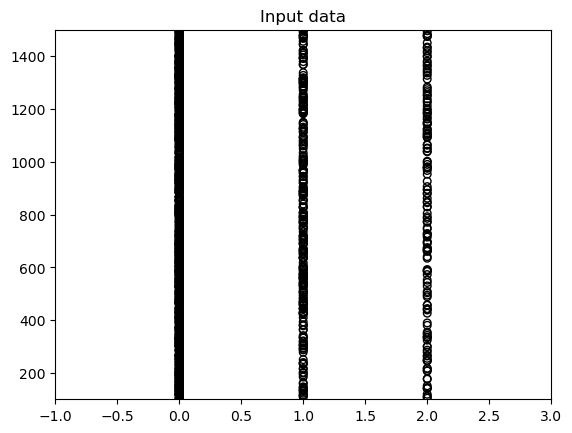

In [128]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

## Step 2: Implement KMeans Algorithm for Training a Prediction Model

### Determine K by Elbow Method

In [286]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation and its centroid
distortions = []
K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Distortion:  [5.041048450484668, 4.917888320587006, 4.826775621742895, 4.742012669705975, 4.680325663576132, 4.6408431304971165, 4.609610753538764, 4.5781238743104975]


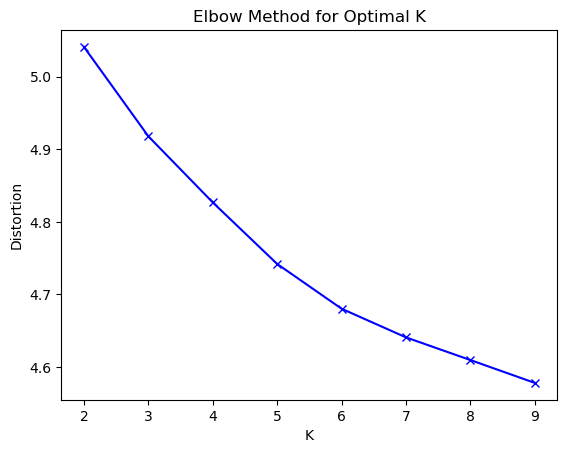

In [288]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [310]:
# Optimal number of clusters K
num_clusters = 2

In [312]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [314]:
# Train the KMeans clustering model
kmeans.fit(X)

C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, n_init=20)

### Determin K by Silhouette Score
A silhouette score is a measure of clusterts quality in terms of __cohesion__ (small distance between the data in one cluster) and __separation__ (large distance between the clusters). <br>
It is calculated for each point separately and then as an average value of the individual scores.<br>
The value is a number [-1, +1]. The best result is 1, while -1 means wrong clustering. The peripherial points in a cluster would produce result close to 0.<br>
We can apply the method for choosing the right number of clusters, as well as for comparing different methods of clustering.
We always search for the maximum silhouette score.

In [316]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 2
Silhouette score = 0.12239225153163955


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 3
Silhouette score = 0.10319429292406143


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 4
Silhouette score = 0.07291762690868099


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 5
Silhouette score = 0.05569517921611462


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 6
Silhouette score = 0.059620376540662226


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 7
Silhouette score = 0.06152671015772919


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 8
Silhouette score = 0.05027493177719143


C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 9
Silhouette score = 0.0499208143481932


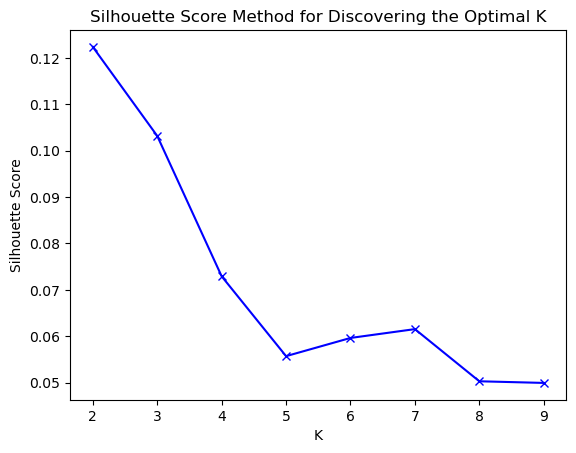

In [318]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

## Step 3: Implement the Trained Model for Prediction

In [320]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([1, 1, 1, ..., 1, 1, 1])

In [322]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[1 1 1 ... 1 1 1]


## Step 4: Review the Results

### Clusters seen one by one

Cluster  0 :  (463, 29)


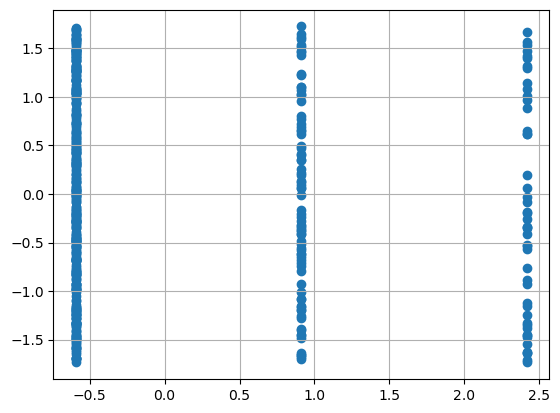

Cluster  1 :  (1007, 29)


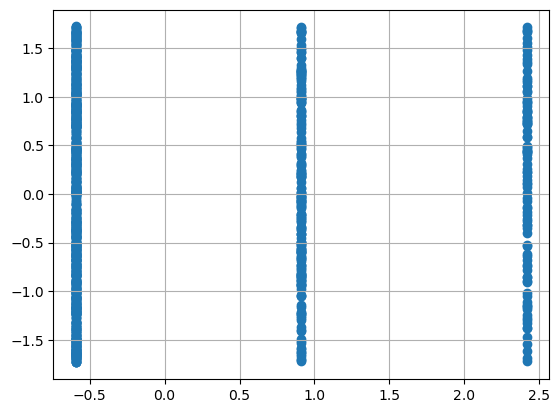

In [324]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

### All Clusters in One Plot

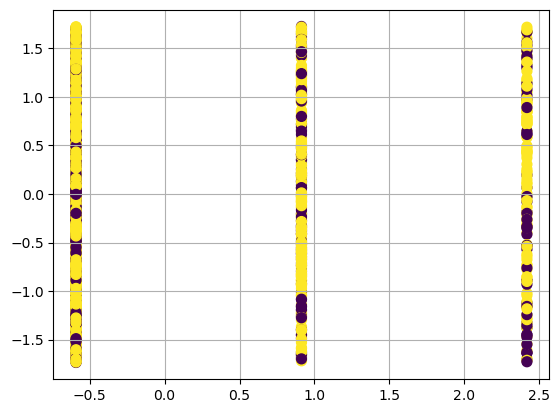

In [326]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [328]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[-0.01537455 -0.01778146 -0.05881673 -0.00350071  0.16310387 -0.02139296
   0.05894371 -0.06524919 -0.0054845   0.00923511  1.0215763   0.35136903
  -0.00456185  0.12736371  0.98989757  0.01105329  0.02772019  0.03848225
  -0.02243807  0.01687193  0.0164471   0.11520616  0.99257836 -0.01522472
   0.03533186  0.97235319  0.95045427  0.80327679  0.90221295]
 [ 0.00706893  0.00817559  0.02704285  0.00160956 -0.07499215  0.00983609
  -0.02710123  0.03000037  0.00252167 -0.00424613 -0.46970192 -0.16155299
   0.00209746 -0.05855948 -0.45513662 -0.0050821  -0.01274523 -0.01769343
   0.01031661 -0.0077574  -0.00756207 -0.05296967 -0.4563692   0.00700004
  -0.01624494 -0.44707004 -0.43700132 -0.36933183 -0.41482085]]


### Print Bondaries of Clusters

In [330]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [332]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans.predict(np.c_[xx,yy])
labels = labels.reshape(x_vals.shape)

ValueError: X has 2 features, but KMeans is expecting 29 features as input.

In [ ]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

For labeling clusters see also https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

In [ ]:
# Repeat the training and clustering with different number of clusters K
# Compare the images
# Select the one with most compact clusters

## Step 5: Validate the Model

In [338]:
#!pip install yellowbrick

In [340]:
from yellowbrick.cluster import SilhouetteVisualizer

In [354]:
k = 7
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

C:\Users\hans7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([4, 0, 5, ..., 0, 4, 5])

In [356]:
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.056


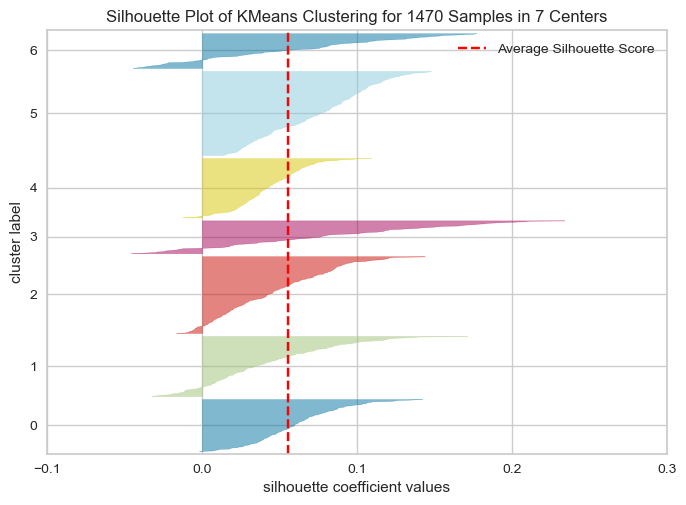

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1470 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [358]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

Interpretation: Each component of the figure represents one cluster with a horisontal bar chart of each cluster point. <br>
Clusters are seen almost equaly tick and long - similar. There is no cluster with a silhouette score lower than the average (the red line). <br>
The score is bigger than 0.5 - relatively good.

## Step 6: Implement the Model on New Data

In [ ]:
# predict cluster of nonseen data
test = kmeans.predict([[5.8, 4.5]])
print(test)

In [ ]:
test = kmeans.predict([[6.0, 8.0]]) == 3
print(test)

## Step 7: Store the Model in a File

In [360]:
#!pip3 install joblib

In [ ]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(kmeans, '../data/kmmodel.pkl')

## Practice

Implement the procedure to a data set from the file __sales.csv__ to segment the sales and discover patterns.
Observe the recommended number of clusters and the initial location of the centroids.